## Stock Market Price Prediction Mini Project


#### For this project, we can use various algorithms. Some of the suitable algorithms for this project are:  
#### 1. XGBoost Regressor

Gradient boosting trees, high accuracy.

Handles non-linear relationships well.

Works well with engineered features like lags and rolling stats.

####  Random Forest Regressor (with Lag Features)

Ensemble of decision trees, robust and interpretable.

Lag features add time context for better predictions.

Good baseline model, faster training.

#### Long Short-Term Memory (LSTM) Networks

Recurrent neural networks designed for sequential data.

Captures temporal dependencies in price and volume.

Requires more data and tuning.

#### ARIMA / SARIMA

Traditional time series forecasting models.

Useful for linear trends and seasonality.

Less effective with complex, nonlinear patterns.

## Implementing the project using RandomForest without lags

RMSE: 14.78
R-squared: 0.9929062962790046
Relative Error: 5.62%


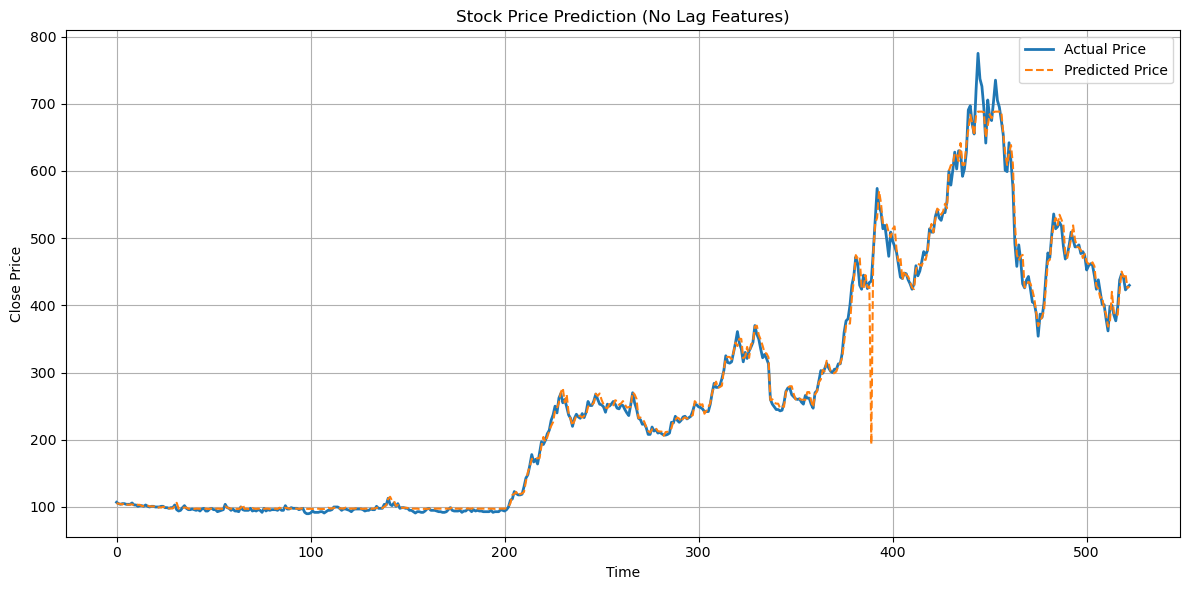

In [10]:
##Importig libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error


# Load the Data
url = "https://raw.githubusercontent.com/sarojrana/nepse-data/main/data/AHPC_2000-01-01_2021-12-31.csv"
df = pd.read_csv(url, parse_dates=['Date'])    #Parse the 'Date' column as datetime objects, initially date is in form of string
df = df.sort_values('Date')                    #sorting in ascending order,critical for time series data

# Feature Selection (drop unused columns)
# Drop date and keep only numeric features except target
features = df.drop(columns=['Date', 'Close Price', 'S.N.'])

# Target variable
target = df['Close Price']

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # .fit() → calculates the mean and standard deviation of each feature in our training data
                                               # .transform() → uses those values to standardize (scale) the training data.

X_test_scaled = scaler.transform(X_test)   # we do not call .fit() on test data because doing so would cause data leakage (letting our model "peek" at future data).


# Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)  # n_estimators --> number of decision trees
model.fit(X_train_scaled, y_train)

# Step 6: Predict and Evaluate
y_pred = model.predict(X_test_scaled)

rmse = root_mean_squared_error(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {model.score(X_test_scaled, y_test)}")
print(f"Relative Error: {100 * rmse / y_test.mean():.2f}%")

# Plot Results

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Price', linewidth=2)
plt.plot(y_pred, label='Predicted Price', linestyle='--')
plt.title('Stock Price Prediction (No Lag Features)')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### RMSE 14.78 means:
On average, our predicted Close Prices are about 14.78 units off from the actual prices. 

#### R-squared 0.9929 means:
about 99.29% of the variance in the Close Price is explained by your model.
It means our model fits the data extremely well.

#### Relative Error of 5.62% means:
On average, our predictions are off by 5.62% compared to the actual closing price.

In [6]:
df.head()

,S.N.,Date,Total Transactions,Total Traded Shares,Total Traded Amount,Max. Price,Min. Price,Close Price
2613,2614,2010-04-15,2,30.0,12900.0,430.0,430.0,430.0
2612,2613,2010-04-15,2,30.0,12900.0,430.0,430.0,430.0
2611,2612,2010-04-15,2,30.0,12900.0,430.0,430.0,430.0
2610,2611,2010-04-19,4,310.0,129590.0,425.0,417.0,417.0
2609,2610,2010-04-20,16,390.0,155760.0,410.0,391.0,396.0


## Implementation of RandomForest using lags

RMSE with 6-day lag features: 13.20
R-squared with 6-day lag features: 0.9943
Relative Error: 5.01%


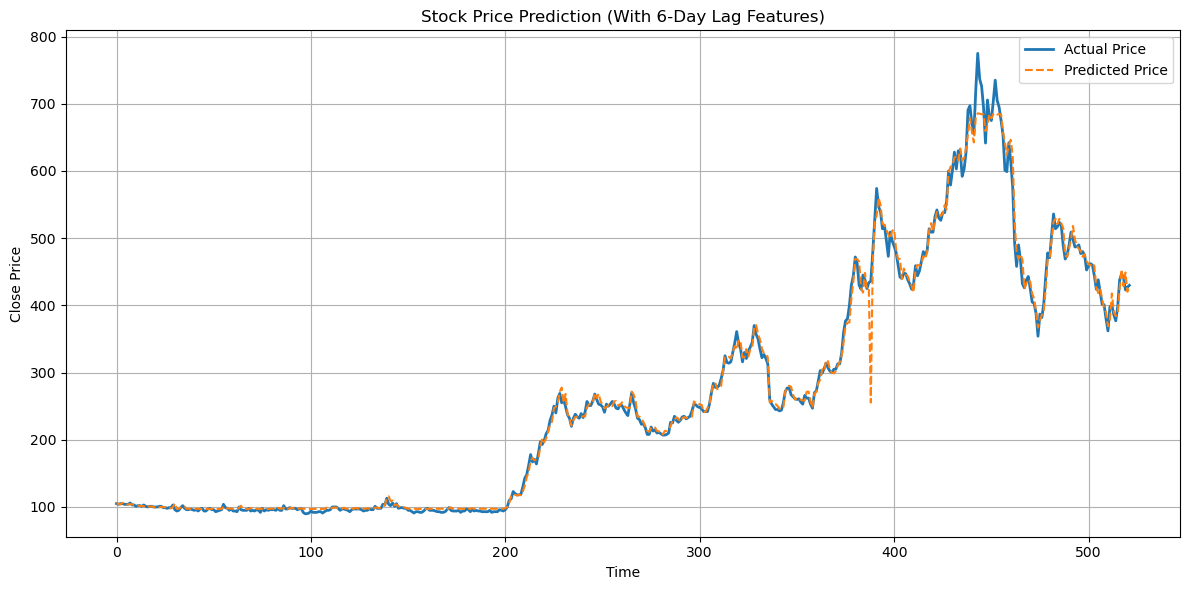

In [26]:
#Importing libraries and modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error

# Load the Data
url = "https://raw.githubusercontent.com/sarojrana/nepse-data/main/data/AHPC_2000-01-01_2021-12-31.csv"
df = pd.read_csv(url, parse_dates=['Date'])
df = df.sort_values('Date')

# Create lag features for Close Price for the past 6 days
lags = [1, 2, 3, 4, 5, 6]
for lag in lags:
    df[f'Close_lag_{lag}'] = df['Close Price'].shift(lag)   # .shift(lag) shifts the Close Price column down by lag rows
                                                            # Close_lag_1 is the previous day’s close price, Close_lag_2 is 2 days ago, etc.
                                                            # allows the model to use historical prices to predict future prices.


# Drop rows with NaN values caused by lagging
df = df.dropna()   #Since lag features create missing values for the first lag rows (there is no previous data for those days), we remove those rows to keep the dataset clean.

# Define features (drop Date and original Close Price since it's the target)
features = df.drop(columns=['Date', 'Close Price','S.N.'])  # Drop Date since it’s a timestamp and usually not directly useful in raw form for prediction.

# Target variable
target = df['Close Price']

# Train-Test Split (no shuffle for time series)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # .fit() → calculates the mean and standard deviation of each feature in our training data
                                               # .transform() → uses those values to standardize (scale) the training data.

X_test_scaled = scaler.transform(X_test)   # we do not call .fit() on test data because doing so would cause data leakage (letting our model "peek" at future data).



# Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict and Evaluate
y_pred = model.predict(X_test_scaled)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"RMSE with 6-day lag features: {rmse:.2f}")
print(f"R-squared with 6-day lag features: {model.score(X_test_scaled, y_test):.4f}")
print(f"Relative Error: {100 * rmse / y_test.mean():.2f}%")

# Plot Results
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Price', linewidth=2)
plt.plot(y_pred, label='Predicted Price', linestyle='--')
plt.title('Stock Price Prediction (With 6-Day Lag Features)')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
df.head()

,S.N.,Date,Total Transactions,Total Traded Shares,Total Traded Amount,Max. Price,Min. Price,Close Price,Close_lag_1,Close_lag_2,Close_lag_3,Close_lag_4,Close_lag_5,Close_lag_6
2607,2608,2010-04-22,4,240.0,92410.0,390.0,375.0,390.0,380.0,396.0,417.0,430.0,430.0,430.0
2606,2607,2010-04-25,8,570.0,219100.0,390.0,380.0,385.0,390.0,380.0,396.0,417.0,430.0,430.0
2605,2606,2010-04-26,5,80.0,30840.0,386.0,385.0,386.0,385.0,390.0,380.0,396.0,417.0,430.0
2604,2605,2010-04-28,4,90.0,35130.0,394.0,387.0,394.0,386.0,385.0,390.0,380.0,396.0,417.0
2603,2604,2010-04-29,6,280.0,113690.0,413.0,400.0,413.0,394.0,386.0,385.0,390.0,380.0,396.0


## Implementation of project using XGBoost and Lag features

RMSE with XGBoost: 15.26
R-squared with XGBoost: 0.9924
Relative Error: 5.80%


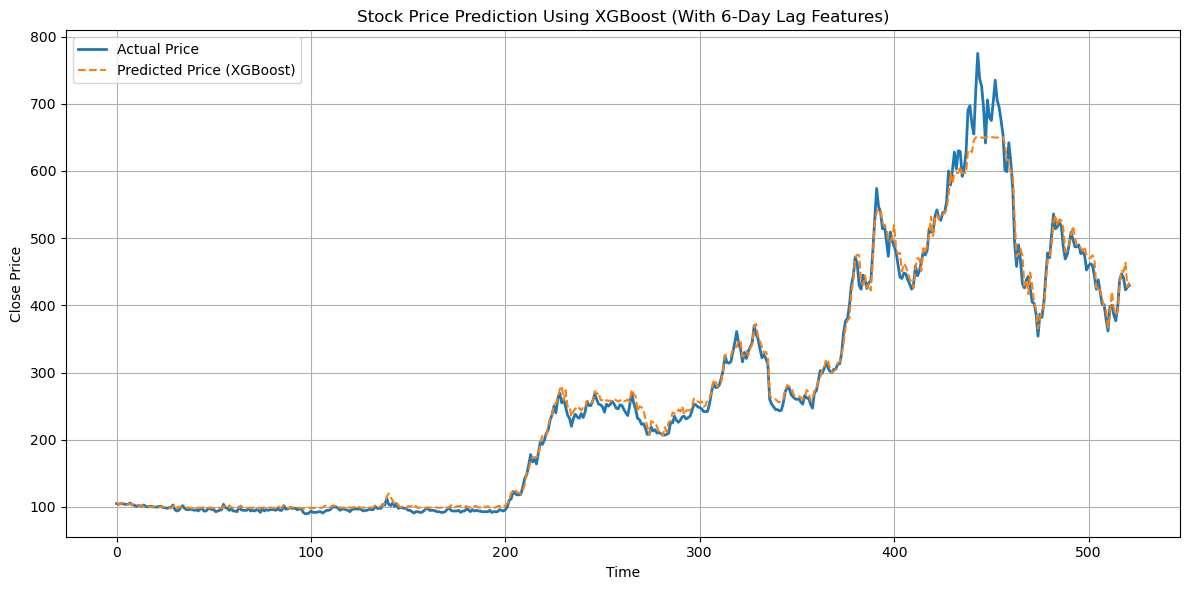

In [ ]:
# Importing libraries and modules
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the Data
url = "https://raw.githubusercontent.com/sarojrana/nepse-data/main/data/AHPC_2000-01-01_2021-12-31.csv"
df = pd.read_csv(url, parse_dates=['Date'])
df = df.sort_values('Date')

# Create lag features for Close Price for the past 6 days
lags = [1, 2, 3, 4, 5, 6]
for lag in lags:
    df[f'Close_lag_{lag}'] = df['Close Price'].shift(lag)

# Drop rows with NaN values caused by lagging
df = df.dropna()

# Define features (drop Date and original Close Price)
features = df.drop(columns=['Date', 'Close Price', 'S.N.'])

# Target variable
target = df['Close Price']

# Train-Test Split (no shuffle for time series)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train XGBoost Regressor
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict and Evaluate
y_pred = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE with XGBoost: {rmse:.2f}")
print(f"R-squared with XGBoost: {r2:.4f}")
print(f"Relative Error: {100 * rmse / y_test.mean():.2f}%")

# Plot Results
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Price', linewidth=2)
plt.plot(y_pred, label='Predicted Price (XGBoost)', linestyle='--')
plt.title('Stock Price Prediction Using XGBoost (With 6-Day Lag Features)')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Implementation of project using LSTM(univariate) without train test split

Epoch 1/10


c:\Users\anish\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0299
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0014
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0011
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 137ms/step - loss: 0.0011
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - loss: 9.4006e-04
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 8.9629e-04
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - loss: 8.0132e-04
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 6.8077e-04
Epoch 9/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - loss: 7.1774e-04
Epoch 10/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 8.7860e-04
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step


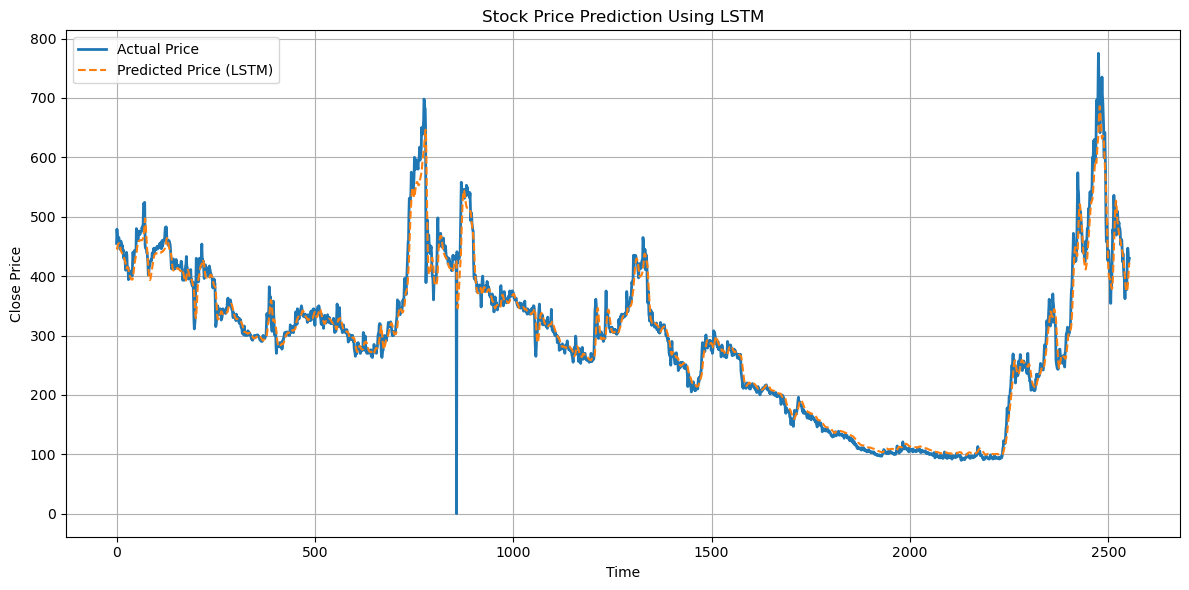

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
The predicted NEPSE price for the next day is :427.15


In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the stock price data
url = "https://raw.githubusercontent.com/sarojrana/nepse-data/main/data/AHPC_2000-01-01_2021-12-31.csv"
df = pd.read_csv(url, parse_dates=['Date'])
df = df.sort_values('Date')  # Ensure chronological order

# Use only the 'Close Price' column
data = df[['Close Price']].copy()

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequences for LSTM
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])  # Input sequence
        y.append(dataset[i, 0])              # Next day's price
    return np.array(X), np.array(y)

# Prepare the data
time_step = 60
X, y = create_dataset(scaled_data, time_step)
X = X.reshape((X.shape[0], X.shape[1], 1))  # Reshape for LSTM input

# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    LSTM(50),
    Dense(1)
])

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=10, batch_size=32, verbose=1)

# Make predictions on the same dataset
y_pred = model.predict(X)

# Inverse transform to original scale
y_pred_inv = scaler.inverse_transform(y_pred)
y_actual_inv = scaler.inverse_transform(y.reshape(-1, 1))

# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_actual_inv, label='Actual Price', linewidth=2)
plt.plot(y_pred_inv, label='Predicted Price (LSTM)', linestyle='--')
plt.title('Stock Price Prediction Using LSTM')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Predict the future NEPSE price (next day)
last_60_days = scaled_data[-60:]
future_input = last_60_days.reshape(1, -1)
future_input = future_input.reshape((1, time_step, 1))
future_price = model.predict(future_input)
future_price = scaler.inverse_transform(future_price)
print(f"The predicted NEPSE price for the next day is :{future_price[0][0]:.2f}")

## Implementation of project using LSTM(univariate) with train test split

Epoch 1/20


c:\Users\anish\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0417
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0010
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0011
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 9.1300e-04
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 7.7075e-04
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0013
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 7.8998e-04
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 7.6407e-04
Epoch 9/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 0.0011
Epoch 10/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 0.0012
Epoch 11/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - loss: 5.3631e-04
Epoch 12/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 9.1765e-04
Epoch 13/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 5.4728e-04
Epoch 14/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 0.0011
Epoch 15/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - 

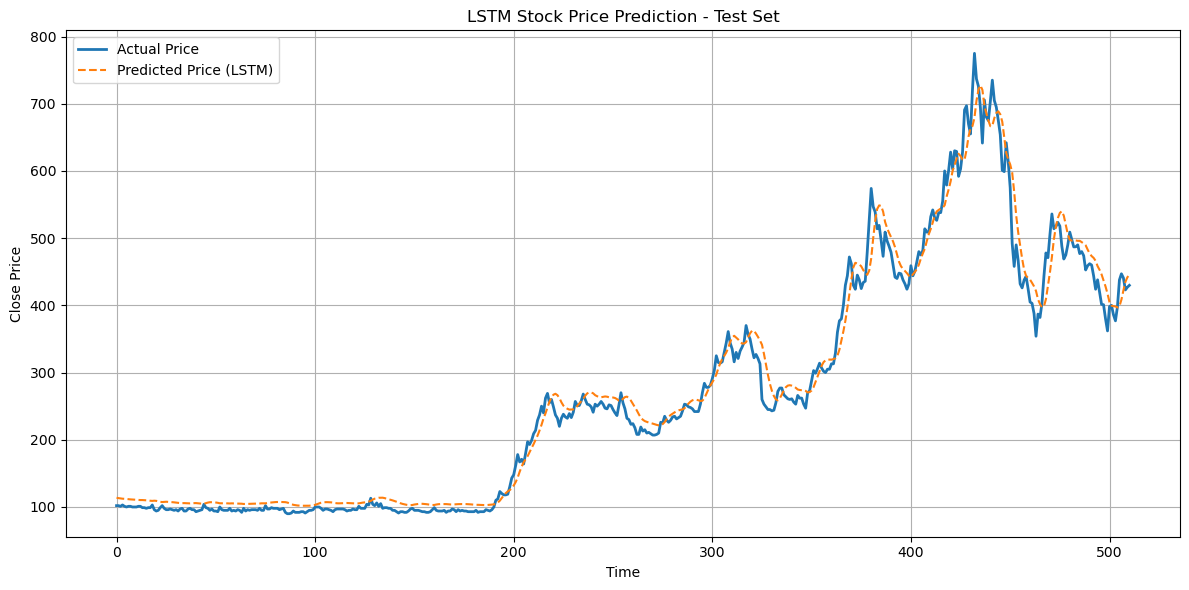

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
The predicted NEPSE price for the next day is : 446.99


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the stock price data
url = "https://raw.githubusercontent.com/sarojrana/nepse-data/main/data/AHPC_2000-01-01_2021-12-31.csv"
df = pd.read_csv(url, parse_dates=['Date'])       
df = df.sort_values('Date')

# Use only the 'Close Price' column
data = df[['Close Price']].copy()   # creates a deep copy , Changes to data won’t affect df, and vice versa.

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequences
def create_dataset(dataset, time_step=60):
    """
    Convert the 1D time series into sequences of length `time_step`
    Each X contains `time_step` values, and y is the next value
    """
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])    # Sequence of 60 previous values
        y.append(dataset[i, 0])                # Target: value at position i
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)    # X.shape = (samples, 60), y.shape = (samples,)

# Split into training and testing sets (80/20)
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Reshape input for LSTM, (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))   #shape: (samples, 60, 1)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    LSTM(50),
    Dense(1)
])

# Compile and train
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Predict on test set
y_pred = model.predict(X_test)     # Predict on test data (returns scaled values)

# Inverse transform to convert into original scale
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))  #inverse_transform expects 2D data, so we perform reshape

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
r2 = r2_score(y_test_inv, y_pred_inv)
relative_error = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

print(f"📊 LSTM Model Evaluation:")
print(f" - RMSE: {rmse:.2f}")
print(f" - R² Score: {r2:.4f}")
print(f" - Relative Error: {relative_error:.2f}%")

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual Price', linewidth=2)
plt.plot(y_pred_inv, label='Predicted Price (LSTM)', linestyle='--')
plt.title('LSTM Stock Price Prediction - Test Set')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Predict the future NEPSE price (next day) ---
# Take the last 60 days from scaled data as input sequence for prediction
last_60_days = scaled_data[-60:]

# Reshape to fit LSTM input shape: (1 sample, 60 time steps, 1 feature)
future_input = last_60_days.reshape(1, time_step, 1)

# Predict the next day's scaled price
future_price_scaled = model.predict(future_input)

# Inverse transform to get actual price
future_price = scaler.inverse_transform(future_price_scaled)  # outputs a 2D numpy array

print(f"The predicted NEPSE price for the next day is : {future_price[0][0]:.2f}") # future_price[0][0] access the first element of the first row of 2D numpy array


## Project Implementation using LSTM(univariate) with early stopping and dropouts

Epoch 1/50


c:\Users\anish\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0287
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0026
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0019
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0021
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0021
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0018
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0021
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0021
Epoch 9/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0019
Epoch 10/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0018
Epoch 11/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0018
Epoch 12/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0020
Epoch 13/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0015
Epoch 14/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0016
Epoch 15/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0015
Epoch 16/50
64/

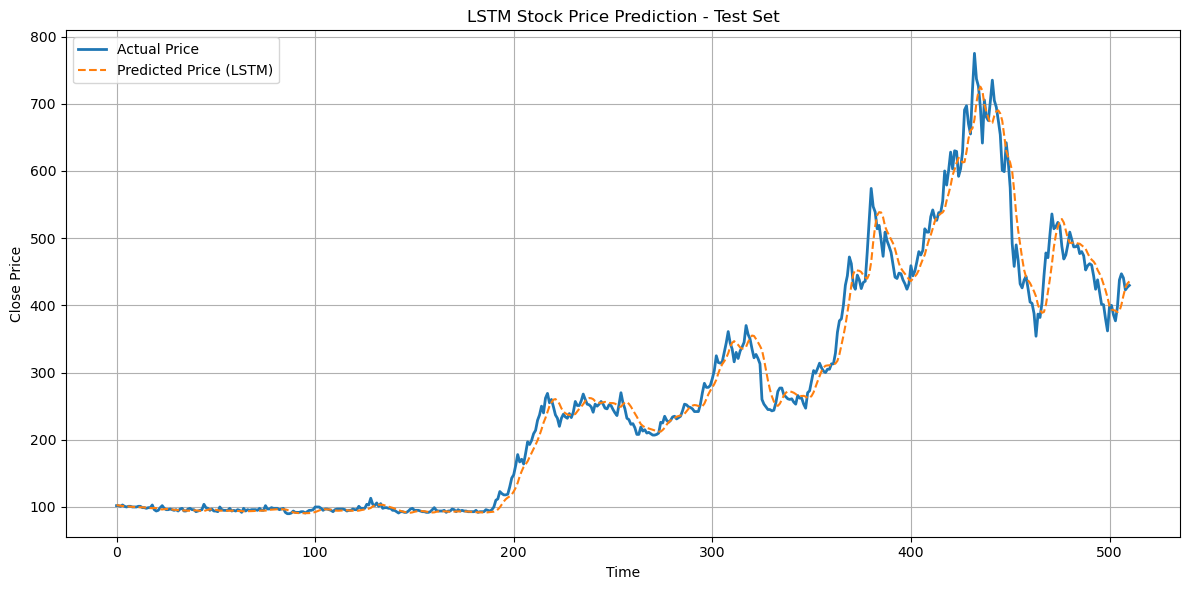

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
The predicted NEPSE price for the next day is : 437.34


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping

# Load the stock price data
url = "https://raw.githubusercontent.com/sarojrana/nepse-data/main/data/AHPC_2000-01-01_2021-12-31.csv"
df = pd.read_csv(url, parse_dates=['Date'])
df = df.sort_values('Date')

# Use only the 'Close Price' column
data = df[['Close Price']].copy()      # Create a copy to safely work with without modifying original

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequences function
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Split data (80/20)
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Reshape input to 3D for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model with Dropout layers to reduce overfitting
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),  # 20% dropout after first LSTM
    LSTM(50),
    Dropout(0.2),  # 20% dropout after second LSTM
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# EarlyStopping monitoring training loss
early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

# Train model (no validation split)
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    verbose=1,
    callbacks=[early_stop]
)

# Predict on test set
y_pred = model.predict(X_test)

# Inverse transform predictions and actual values
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
r2 = r2_score(y_test_inv, y_pred_inv)
relative_error = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

print(f"📊 LSTM Model Evaluation with Dropout and EarlyStopping (no val split):")
print(f" - RMSE: {rmse:.2f}")
print(f" - R² Score: {r2:.4f}")
print(f" - Relative Error: {relative_error:.2f}%")

# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual Price', linewidth=2)
plt.plot(y_pred_inv, label='Predicted Price (LSTM)', linestyle='--')
plt.title('LSTM Stock Price Prediction - Test Set')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Predict the next day price
last_60_days = scaled_data[-60:]
future_input = last_60_days.reshape(1, time_step, 1)
future_price_scaled = model.predict(future_input)
future_price = scaler.inverse_transform(future_price_scaled)
print(f"The predicted NEPSE price for the next day is : {future_price[0][0]:.2f}")


## Project Implementation using LSTM(multivariate) with early stopping and dropouts

Epoch 1/30


c:\Users\anish\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0477 - val_loss: 2.0116e-05
Epoch 2/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0025 - val_loss: 2.5411e-05
Epoch 3/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0027 - val_loss: 2.8729e-05
Epoch 4/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0024 - val_loss: 3.9278e-05
Epoch 5/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0020 - val_loss: 1.8442e-05
Epoch 6/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0018 - val_loss: 1.7291e-05
Epoch 7/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0024 - val_loss: 2.3565e-05
Epoch 8/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0020 - val_loss: 1.4504e-05
Epoch 9/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0017 - val_loss: 1.1331e-04
Epoch 10/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0020 - val_loss: 3.9954e-05
Epoch 11/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0018 - val_loss: 5.3237e-05
Epoch 12/30
58/58 ━━━━━━━━━━━━

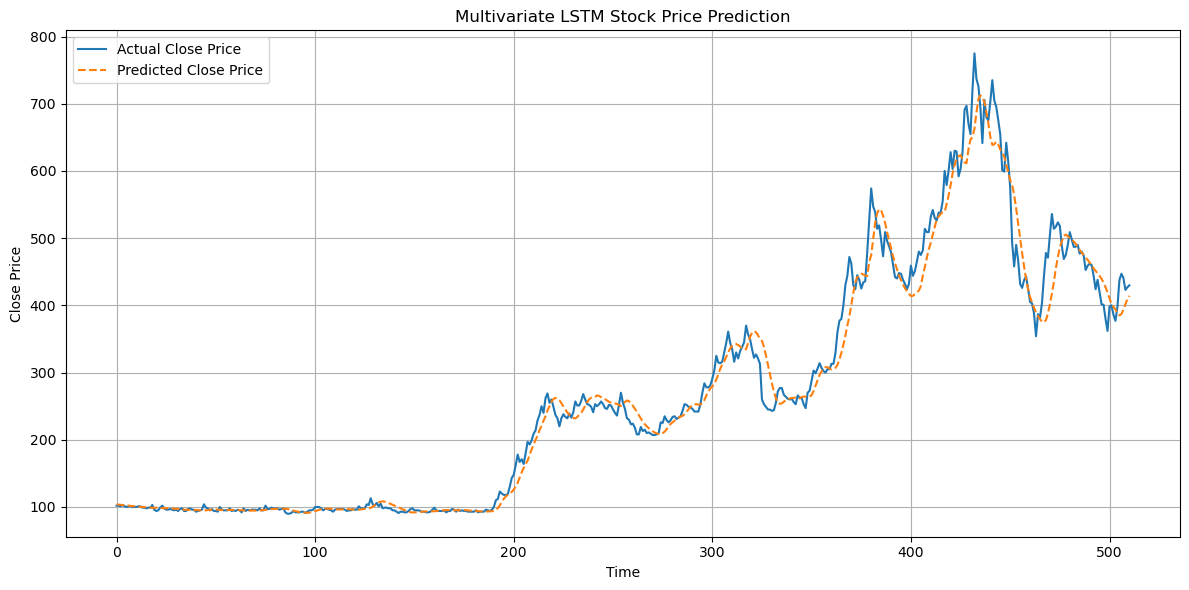

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
The predicted NEPSE price for the next day is : 416.47


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping

# Load data
url = "https://raw.githubusercontent.com/sarojrana/nepse-data/main/data/AHPC_2000-01-01_2021-12-31.csv"
df = pd.read_csv(url, parse_dates=['Date'])
df = df.sort_values('Date')

# Define features (drop Date and original Close Price since it's the target)
features = df.drop(columns=['Date', 'Close Price','S.N.'])  # Drop Date since it’s a timestamp and usually not directly useful in raw form for prediction.

# Target variable
target = df[['Close Price']] # outputs a 2D data which is expected my MinMaxScaler

# Use separate scalers for features and target to avoid distortion
# -------------------------------
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

# Fit and transform features
scaled_features = feature_scaler.fit_transform(features)
# Fit and transform target
scaled_target = target_scaler.fit_transform(target)

# Create sequences for LSTM
def create_dataset(X, y, time_step=60):
    """
    Generates sequences of input features (X) and corresponding targets (y).
    Each sequence is of length `time_step`, and target is the value right after the sequence.
    """
    Xs, ys = [], []
    for i in range(time_step, len(X)):
        Xs.append(X[i-time_step:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)

time_step = 60
X, y = create_dataset(scaled_features, scaled_target, time_step)  # X: (samples, 60, 5), y: (samples, 1)

# Train-test split
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# Build LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping: stop training if validation loss doesn't improve for 10 epochs
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train model
model.fit(X_train, y_train, validation_split=0.1, epochs=30, batch_size=32, callbacks=[early_stop], verbose=1)

# Predict
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual targets to original scale (Close Price)
y_pred_inv = target_scaler.inverse_transform(y_pred)  # Predicted prices in original scale
y_test_inv = target_scaler.inverse_transform(y_test)  # Actual prices in original scale

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
r2 = r2_score(y_test_inv, y_pred_inv)
rel_err = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

print(f"\n📊 Multivariate LSTM Model Evaluation:")
print(f" - RMSE: {rmse:.2f}")
print(f" - R² Score: {r2:.4f}")
print(f" - Relative Error: {rel_err:.2f}%")

# Plot results
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Actual Close Price')
plt.plot(y_pred_inv, label='Predicted Close Price', linestyle='--')
plt.title('Multivariate LSTM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Predict the future NEPSE price (next day) 
# Take the last 60 days of scaled features as input sequence for prediction
last_60_days = scaled_features[-time_step:]  # shape: (60, num_features)

# Reshape to fit LSTM input shape: (1 sample, 60 time steps, num_features)
future_input = last_60_days.reshape(1, time_step, scaled_features.shape[1])

# Predict the next day's scaled price (model output shape: (1,1))
future_price_scaled = model.predict(future_input)

# Inverse transform to get actual price (using target_scaler)
future_price = target_scaler.inverse_transform(future_price_scaled)

print(f"The predicted NEPSE price for the next day is : {future_price[0][0]:.2f}")
